## LAB 6

In [272]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline

LHC
For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

In [273]:
from scipy.stats import poisson

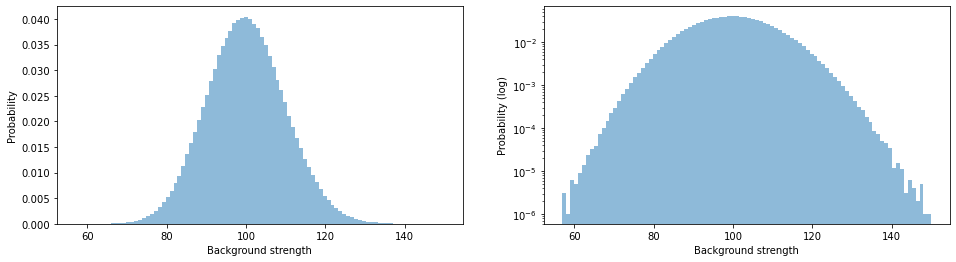

In [278]:
fig, (ax,ax2) = plt.subplots(1, 2,figsize=(16,4))
mu = 100
bkgd=np.random.poisson(lam=mu,size=1000000)
ax.hist(bkgd,bins=len(np.unique(bkgd)-10),density=True,alpha=0.5)
ax2.hist(bkgd,bins=len(np.unique(bkgd)-10),density=True,alpha=0.5)
ax2.set_yscale("log")
ax.set_xlabel("Background strength")
ax.set_ylabel("Probability")
ax2.set_xlabel("Background strength")
ax2.set_ylabel("Probability (log)")
plt.show()

##### Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [308]:
sigma=5
sigma_to_percent=scipy.stats.norm.cdf(5)
threshold=poisson.ppf(sigma_to_percent,mu=mu)
threshold

154.0

<b> 5 sigma</b> @ 154.0 





##### Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

In [309]:
Signal=200
data=bkgd+(4*Signal)

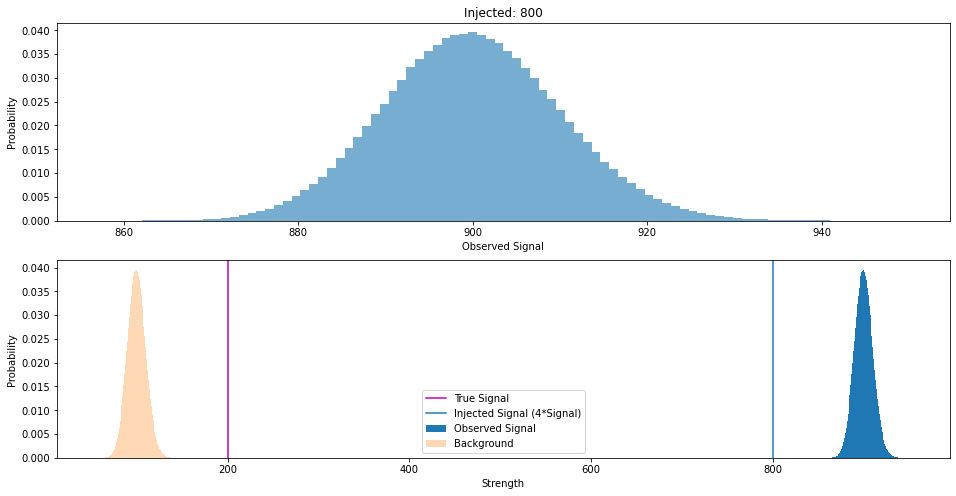

In [310]:
fig,(ax,ax2)=plt.subplots(2,1,figsize=(16,8))
ax.hist(data,bins=92,alpha=0.6,label="Observed Signal",density=True)
ax2.hist(data,bins=92,alpha=1,label="Observed Signal",density=True)
ax2.hist(bkgd,bins=92,alpha=0.3,label="Background",density=True)
ax2.axvline(x=Signal,label="True Signal",c="m")
ax2.axvline(x=4*Signal,label="Injected Signal (4*Signal)")
ax.set_title(f'Injected: {4*Signal}')
ax2.set_xlabel("Strength")
ax.set_xlabel("Observed Signal")
ax2.set_ylabel("Probability")
ax.set_ylabel("Probability")
#plt.hist(Signal,alpha=0.3,label="Signal",density=True)
ax2.legend()
plt.show()

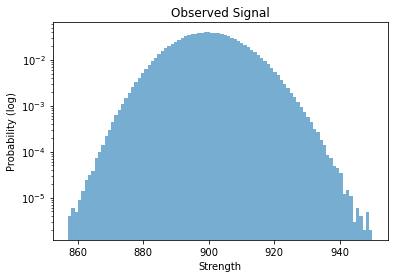

In [312]:
plt.hist(data,bins=92,alpha=0.6,label="Data",density=True)
plt.ylabel("Probability (log)")
plt.title("Observed Signal")
plt.xlabel("Strength")
plt.yscale("log")
plt.show()

#### a) 

The histogram is a distribution which peaks at ~900. As seen from the log plot,it is not a Gaussian and tails to the right. However, as seen from the cell just above, we are equally likely to observe signals greater than or less than ~900. Thus, we're more likely to observe values higher than 900. 

#### b)

Yes, the observed signal is biased as it is stronger than the true injected signal. This is because the background is always positive. Thus, the observed signal is not symmetric about the true signal. In addition, the shape of data itself is not symmetriric about the peak as the histogram tails to the right as discussed in a). 

#### Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

#### a)

Simulating a uniform suite of signals in the range 0-2000 with <u> equal probability </u> of measuring any value. This is done to avoid an implicit prior. 

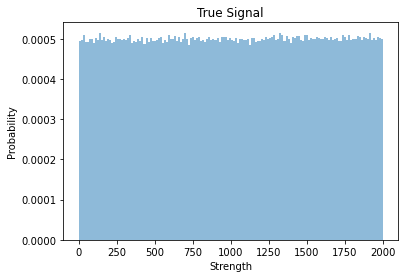

In [304]:
signal_2=np.random.uniform(0,2000,1000000)
plt.hist(signal,bins=150,alpha=0.5,density=True)
plt.xlabel("Strength")
plt.ylabel("Probability")
plt.title("True Signal")
plt.show()

In [314]:
data_2=signal_2+bkgd

> Checking range for subsequent steps. 

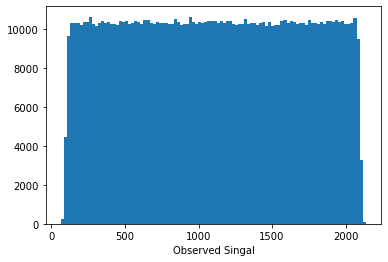

In [315]:
plt.hist(data_2,bins=100)
plt.xlabel("Observed Singal")
plt.show()

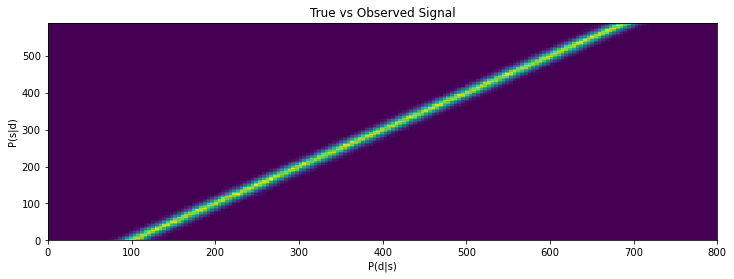

94

In [317]:
plt.figure(figsize=(12,4))
dataedges=np.linspace(0,2200,500)
signaledges=np.linspace(0,2000,500)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

h,x_edges,y_edges,image=plt.hist2d(data_2,signal_2,bins=[dataedges,signaledges],density=True)
plt.xlabel("P(d|s)")
plt.ylabel("P(s|d)")
plt.xlim(0,800)
plt.ylim(0,590)
plt.title("True vs Observed Signal")
plt.show()
len(np.unique((data.astype(int)))) #checking number of bins

### b) 
For the same injected signal power as in problem 2, show that you get the same answer.

In [318]:
def find_nearest(array, value):
    array = array
    idx = (np.abs(array - value)).argmin()
    return [idx,array[idx]]
def normed(array):
    mag=np.sum(array)
    return (array/mag)

In [319]:
df=pd.DataFrame(data_2,columns=["data"])

In [320]:
df["signal"]=signal_2
df["bkgd"]=bkgd

In [321]:
df.head(3)

,data,signal,bkgd
0,480.211186,367.211186,113
1,1585.954146,1483.954146,102
2,588.356572,476.356572,112


Index: 199 ;  Signal: 799.5991983967936


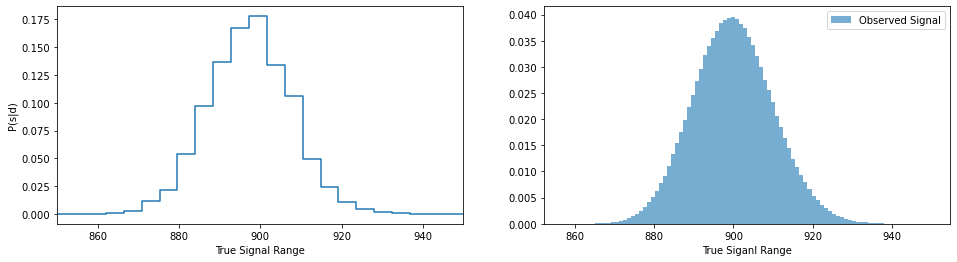

In [326]:
injected=800
i,s=find_nearest(signalcenters,injected)
h_slice=normed(h.T[i])
print ("Index:",i,";  Signal:",s)

fig,(ax,ax2)=plt.subplots(1,2,figsize=(16,4))
ax.step(datacenters,h_slice,label="P(d|s)")
ax2.hist(data,bins=92,alpha=0.6,label="Observed Signal",density=True)

ax.set_ylabel("P(s|d)")
ax.set_xlabel("True Signal Range")
plt.xlabel("True Siganl Range")
ax.set_xlim(850,950)
plt.legend()
plt.show()

As we can see, we get the same distribution since in problem 2, we're just slicing the data at a specific signal (equal to the signal in problem 1) and the background is the same in both cases. 

#### c) 

Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

In [332]:
observed= [300,302] 

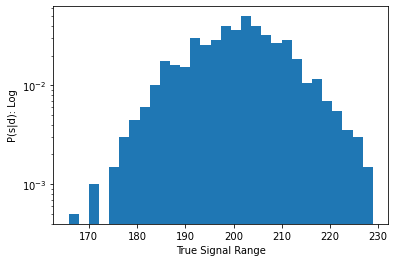

In [333]:
d=df.query(f'{observed[0]}< data <{observed[1]}')
h,b,p=plt.hist(d["signal"],bins=30,density=True)
plt.xlabel("True Signal Range")
plt.ylabel("P(s|d): Log")
plt.yscale("log")

Text(0, 0.5, 'P(s|d)')

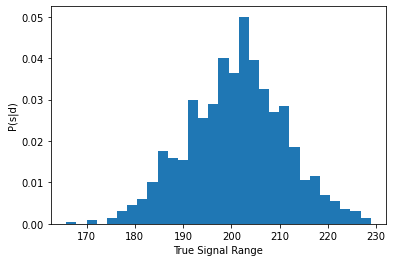

In [334]:
d=df.query(f'{observed[0]}< data <{observed[1]}')
h,b,p=plt.hist(d["signal"],bins=30,density=True)
plt.xlabel("True Signal Range")
plt.ylabel("P(s|d)")

A true signal of ~201 is most likely to give an observed signal of avg. magnitude ~301. The distribution peaks at ~201 and is slightly asymmetric about it. True signal is more likely to be less than the peak since the histogram tails to the left. Note, the true signal range is lower than observed value because our background is positive and tails to the right.

#### d) 

In [335]:
h,b,p=plt.hist(d["signal"],bins=len(np.unique(d))-1,density=True)
plt.close()

In [336]:
sigma_to_percent=[]
sigma_to_percent.append(1-scipy.stats.norm.cdf(1))
sigma_to_percent.append(scipy.stats.norm.cdf(1))
width=np.diff(b)
bounds=[]
for i in range (len(h/2)):
    if np.sum(h[:i]*width[:i])>=sigma_to_percent[0]:
        bounds.append(i)
        break
for i in range (len(h/2)):
    if np.sum(h[:i]*width[:i])>=sigma_to_percent[1]:
        bounds.append(i)
        break
bounds

[782, 1405]

Checking our numbers:

In [337]:
print (np.sum(h[0:bounds[0]]*width[0:bounds[0]]),sigma_to_percent[0])
print (np.sum(h[0:bounds[1]]*width[0:bounds[1]]),sigma_to_percent[1])

0.15894736842105264 0.15865525393145707
0.8421052631578947 0.8413447460685429


The minor difference is due to bins.

In [342]:
mean=202
val=[b[bounds[0]+1],b[bounds[1]+1]]
val
sigma_difference=[(mean-val[0]),(val[1]-mean)]
sigma_difference

[10.962732053612427, 9.13967909382194]

In [343]:
mean,val

(202, [191.03726794638757, 211.13967909382194])

<b> 1 sigma uncertainty </b> <br> Left : 10.96 <br> Right: 9.13 <br>
Due to the asymmetric nature of curve which tails to the left, the uncertainty farther from the mean on the left and is as follows :   <b> -10.96 and +9.13 </b>. 

#### e) 
My uncertainty is assymetric and mirrors the assymetric nature of my true signal.Because the true signal distribution is assymetric and tails to the left, the left 1 sigma point is further away from the "mean" than the right. 

Because our data is always larger than the true signal (due to positive background) we have a positive bias in measured signal, i.e it is always greater than the true signal. In addition, our true signal is more likely to be less than ~201 when the observed signal ranges from 299 to 301. As indicated by the first figure on the page, the background is slightly assymetric and tails to the right. Indiacating that observed data should tail to the right and thus the true signal should tail to the left. 

As seen below, it checks out because P(d|s) tails to the right whereas P(s|d) tails to the left for the same respective ranges.

Text(0, 0.5, 'P(s|d)')

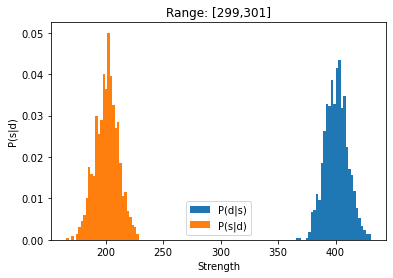

In [340]:
d2=df.query(f'{observed[0]}< signal <{observed[1]}')

plt.title("Range: [299,301]")
h2,b2,p2=plt.hist(d2["data"],bins=30,density=True,label="P(d|s)")
h2,b2,p2=plt.hist(d["signal"],bins=30,density=True,label="P(s|d)")

plt.legend()
plt.xlabel("Strength")
plt.ylabel("P(s|d)")